In [ ]:
#. DESCRIPTION
The given dataset is quiet simple but the complexity is arises due to the fact that dataset contain less samples
and high in imbalancing .
where we can estimate Body Mass Index with respect to Gender,Height& Weight.
 and we can overcome through this obstacle by which we build a good predictive model to classify the Index

The given dataset consit of following columns.


Gender : Male / Female
Height : Number (cm)
Weight : Number (Kg)
Index : 0 - Extremely Weak
 1 - Weak
 2 - Normal
 3 - Overweight
 4 - Obesity
 5 - Extreme Obesity

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving bmi.csv to bmi (5).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bmi.csv']))#

In [ ]:
df

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3
...,...,...,...,...
495,1,150,153,5
496,1,184,121,4
497,1,141,136,5
498,0,150,95,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  500 non-null    int64
 1   Height  500 non-null    int64
 2   Weight  500 non-null    int64
 3   Index   500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


In [ ]:
df.describe()

,Gender,Height,Weight,Index
count,500.000000,500.000000,500.000000,500.000000
mean,0.510000,169.944000,106.000000,3.748000
std,0.500401,16.375261,32.382607,1.355053
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,1.000000,170.500000,106.000000,4.000000
75%,1.000000,184.000000,136.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


In [ ]:
df['Index'].unique()

array([4, 2, 3, 5, 1, 0])

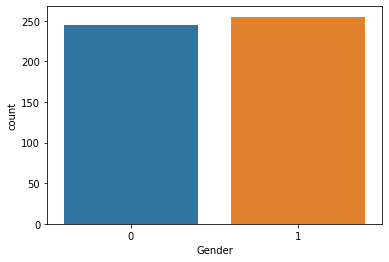

In [ ]:
sns.countplot(df['Gender'])

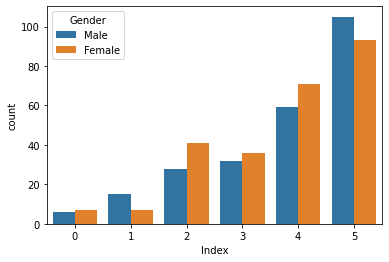

In [ ]:
sns.countplot(df['Index'],hue=(df['Gender']))

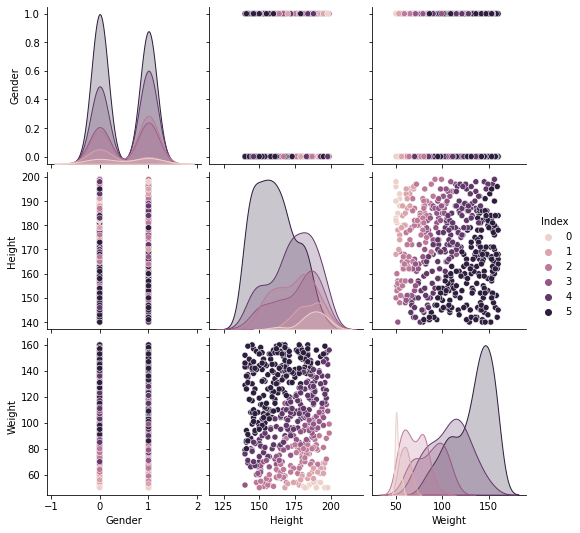

In [ ]:
sns.pairplot(data=df,hue='Index')

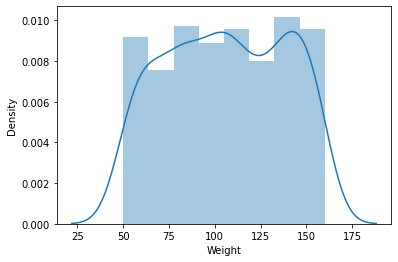

In [ ]:
sns.distplot(df['Weight'])

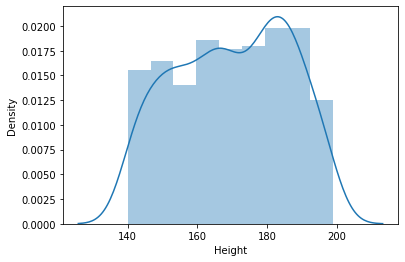

In [ ]:
sns.distplot(df['Height'])

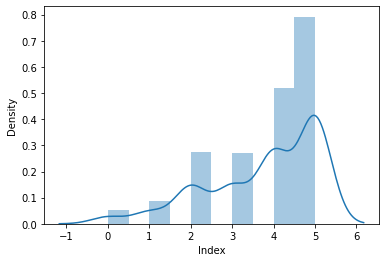

In [ ]:
sns.distplot(df['Index'])

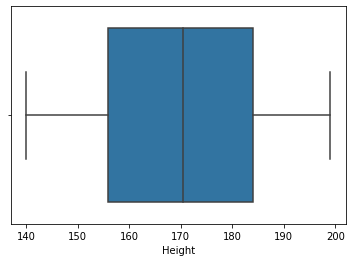

In [ ]:
sns.boxplot(data=df,x='Height')

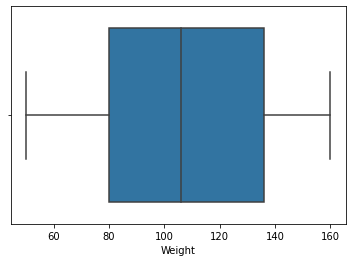

In [ ]:
sns.boxplot(data=df,x='Weight')

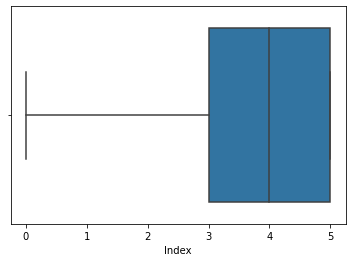

In [ ]:
sns.boxplot(data=df,x='Index')

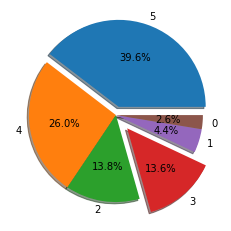

In [ ]:
plt.pie(df['Index'].value_counts(),labels=df['Index'].value_counts().index,shadow=True,autopct='%2.1f%%',explode=[0.1,0.0,0.0,0.2,0.0,0.0])
plt.show()

In [ ]:
# 0. extremely weak
#1.weak
#2.normal
#3.overweight
#4.obesity
# 5.Extreme obesity

In [ ]:
# preprocessing

In [ ]:
df['Gender'].replace('Male',0,inplace=True)
df['Gender'].replace('Female',1,inplace=True)

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
x

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61
...,...,...,...
495,1,150,153
496,1,184,121
497,1,141,136
498,0,150,95


In [ ]:
y

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64

In [ ]:
df

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3
...,...,...,...,...
495,1,150,153,5
496,1,184,121,4
497,1,141,136,5
498,0,150,95,5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)

array([[-1.02020406,  0.24793878, -0.30911702],
       [-1.02020406,  1.16487212, -0.58732233],
       [ 0.98019606,  0.92035656,  0.12364681],
       ...,
       [ 0.98019606, -1.76931458,  0.92735105],
       [-1.02020406, -1.21915457, -0.34002872],
       [-1.02020406,  0.18680989,  0.77279254]])

In [ ]:
# MODELS

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f'accuracy:-{ac}')
print(f'confusion:-\n {cm}')
print(cr)

accuracy:-0.7666666666666667
confusion:-
 [[ 4  0  0  0  0  0]
 [ 1  2  1  0  0  0]
 [ 0  1 17  2  0  0]
 [ 0  0  3 10  7  0]
 [ 0  0  0  9 28  5]
 [ 0  0  0  0  6 54]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.67      0.50      0.57         4
           2       0.81      0.85      0.83        20
           3       0.48      0.50      0.49        20
           4       0.68      0.67      0.67        42
           5       0.92      0.90      0.91        60

    accuracy                           0.77       150
   macro avg       0.73      0.74      0.73       150
weighted avg       0.77      0.77      0.77       150



In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC()
svm.fit(xtrain,ytrain)
ypred1=svm.predict(xtest)

In [ ]:
ac=accuracy_score(ytest,ypred1)
cm=confusion_matrix(ytest,ypred1)
cr=classification_report(ytest,ypred1)

print(f'accuracy:-{ac}')
print(f'confusion:-\n {cm}')
print(cr)

accuracy:-0.84
confusion:-
 [[ 0  0  4  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0 18  2  0  0]
 [ 0  0  5  8  7  0]
 [ 0  0  0  0 40  2]
 [ 0  0  0  0  0 60]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.58      0.90      0.71        20
           3       0.80      0.40      0.53        20
           4       0.85      0.95      0.90        42
           5       0.97      1.00      0.98        60

    accuracy                           0.84       150
   macro avg       0.53      0.54      0.52       150
weighted avg       0.81      0.84      0.81       150



In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [ ]:
knn=KNN()
knn.fit(xtrain,ytrain)
ypred2=knn.predict(xtest)

In [ ]:
ac=accuracy_score(ytest,ypred2)
cm=confusion_matrix(ytest,ypred2)
cr=classification_report(ytest,ypred2)

print(f'accuracy:-{ac}')
print(f'confusion:-\n {cm}')
print(cr)

accuracy:-0.9266666666666666
confusion:-
 [[ 4  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  1 19  0  0  0]
 [ 0  0  1 18  1  0]
 [ 0  0  0  1 39  2]
 [ 0  0  0  0  5 55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.80      1.00      0.89         4
           2       0.95      0.95      0.95        20
           3       0.95      0.90      0.92        20
           4       0.87      0.93      0.90        42
           5       0.96      0.92      0.94        60

    accuracy                           0.93       150
   macro avg       0.92      0.95      0.93       150
weighted avg       0.93      0.93      0.93       150



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred3=dtc.predict(xtest)

In [ ]:
ac=accuracy_score(ytest,ypred3)
cm=confusion_matrix(ytest,ypred3)
cr=classification_report(ytest,ypred3)

print(f'accuracy:-{ac}')
print(f'confusion:-\n {cm}')
print(cr)

accuracy:-0.8733333333333333
confusion:-
 [[ 4  0  0  0  0  0]
 [ 1  3  0  0  0  0]
 [ 0  2 17  1  0  0]
 [ 0  0  1 15  4  0]
 [ 0  0  1  2 34  5]
 [ 0  0  0  0  2 58]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.60      0.75      0.67         4
           2       0.89      0.85      0.87        20
           3       0.83      0.75      0.79        20
           4       0.85      0.81      0.83        42
           5       0.92      0.97      0.94        60

    accuracy                           0.87       150
   macro avg       0.82      0.85      0.83       150
weighted avg       0.87      0.87      0.87       150



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred4=rf.predict(xtest)

In [ ]:
ac=accuracy_score(ytest,ypred4)
cm=confusion_matrix(ytest,ypred4)
cr=classification_report(ytest,ypred4)

print(f'accuracy:-{ac}')
print(f'confusion:-\n {cm}')
print(cr)

accuracy:-0.8666666666666667
confusion:-
 [[ 3  1  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3 14  2  1  0]
 [ 0  0  1 16  3  0]
 [ 0  0  0  1 37  4]
 [ 0  0  0  0  4 56]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         4
           2       0.93      0.70      0.80        20
           3       0.84      0.80      0.82        20
           4       0.82      0.88      0.85        42
           5       0.93      0.93      0.93        60

    accuracy                           0.87       150
   macro avg       0.84      0.84      0.82       150
weighted avg       0.88      0.87      0.87       150



In [ ]:
from sklearn.ensemble  import GradientBoostingClassifier

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred5=gb.predict(xtest)

In [ ]:
ac=accuracy_score(ytest,ypred5)
cm=confusion_matrix(ytest,ypred5)
cr=classification_report(ytest,ypred5)

print(f'accuracy:-{ac}')
print(f'confusion:-\n {cm}')
print(cr)

accuracy:-0.8866666666666667
confusion:-
 [[ 4  0  0  0  0  0]
 [ 0  2  2  0  0  0]
 [ 0  1 16  3  0  0]
 [ 0  0  2 17  1  0]
 [ 0  0  0  2 37  3]
 [ 0  0  0  0  3 57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      0.50      0.57         4
           2       0.80      0.80      0.80        20
           3       0.77      0.85      0.81        20
           4       0.90      0.88      0.89        42
           5       0.95      0.95      0.95        60

    accuracy                           0.89       150
   macro avg       0.85      0.83      0.84       150
weighted avg       0.89      0.89      0.89       150



In [ ]:
# HYPERPARAMETER TUNNING

In [ ]:
accuracy=[]
for i in range(1,30):
  knn=KNN(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  ypred=knn.predict(xtest)
  ac=accuracy_score(ytest,ypred)
  accuracy.append(ac)

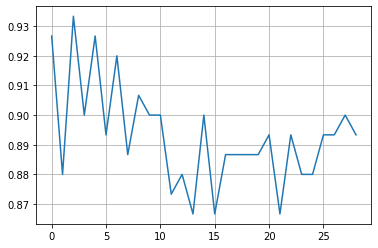

In [ ]:
plt.plot(accuracy)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn1=KNN(n_neighbors=3)
knn1.fit(xtrain,ytrain)
ypred=knn1.predict(xtest)

In [ ]:
print(accuracy_score(ytest,ypred))

0.9333333333333333
